In [23]:
import pandas as pd
import os

DATA_PATH =  r'/Users/pankajti/dev/data/kaggle/nasa/CMaps'
files = os.listdir(DATA_PATH)
columns = ['unit_number','time_in_cycles','setting_1','setting_2','TRA','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]

for f in files:
    if f.startswith("train") or f.startswith("test"):
        file_path = os.path.join(DATA_PATH,f)
        print(f"file {file_path} exists" )
        if os.path.exists(file_path):
            data = pd.read_csv(file_path, sep=" ", header = None)
            data.drop(columns=[26,27],inplace=True)
            data.columns = columns 
            data.drop(columns=['Nf_dmd','PCNfR_dmd','P2','T2','TRA','farB','epr'],inplace=True)
            print(f"shape of data {data.shape} "  )

file /Users/pankajti/dev/data/kaggle/nasa/CMaps/train_FD001.txt exists
shape of data (20631, 19) 
file /Users/pankajti/dev/data/kaggle/nasa/CMaps/train_FD003.txt exists
shape of data (24720, 19) 
file /Users/pankajti/dev/data/kaggle/nasa/CMaps/train_FD002.txt exists
shape of data (53759, 19) 
file /Users/pankajti/dev/data/kaggle/nasa/CMaps/train_FD004.txt exists
shape of data (61249, 19) 
file /Users/pankajti/dev/data/kaggle/nasa/CMaps/test_FD003.txt exists
shape of data (16596, 19) 
file /Users/pankajti/dev/data/kaggle/nasa/CMaps/test_FD002.txt exists
shape of data (33991, 19) 
file /Users/pankajti/dev/data/kaggle/nasa/CMaps/test_FD001.txt exists
shape of data (13096, 19) 
file /Users/pankajti/dev/data/kaggle/nasa/CMaps/test_FD004.txt exists
shape of data (41214, 19) 


In [43]:
[(f"{x}_FD00{i}.txt")  for i in range(1,5) for x in ['train' , 'test' , 'RUL']]

['train_FD001.txt',
 'test_FD001.txt',
 'RUL_FD001.txt',
 'train_FD002.txt',
 'test_FD002.txt',
 'RUL_FD002.txt',
 'train_FD003.txt',
 'test_FD003.txt',
 'RUL_FD003.txt',
 'train_FD004.txt',
 'test_FD004.txt',
 'RUL_FD004.txt']

In [35]:
data.head(1).T

,0
unit_number,1.0000
time_in_cycles,1.0000
setting_1,20.0072
setting_2,0.7000
T24,606.6700
T30,1481.0400
T50,1227.8100
P15,13.6000
P30,332.5200
Nf,2323.6700


In [24]:
def prepare_train_data(data, factor = 0):
    df = data.copy()
    fd_RUL = df.groupby('unit_number')['time_in_cycles'].max().reset_index()
    fd_RUL = pd.DataFrame(fd_RUL)
    fd_RUL.columns = ['unit_number','max']
    df = df.merge(fd_RUL, on=['unit_number'], how='left')
    df['RUL'] = df['max'] - df['time_in_cycles']
    df.drop(columns=['max'],inplace = True)
    
    return df[df['time_in_cycles'] > factor]

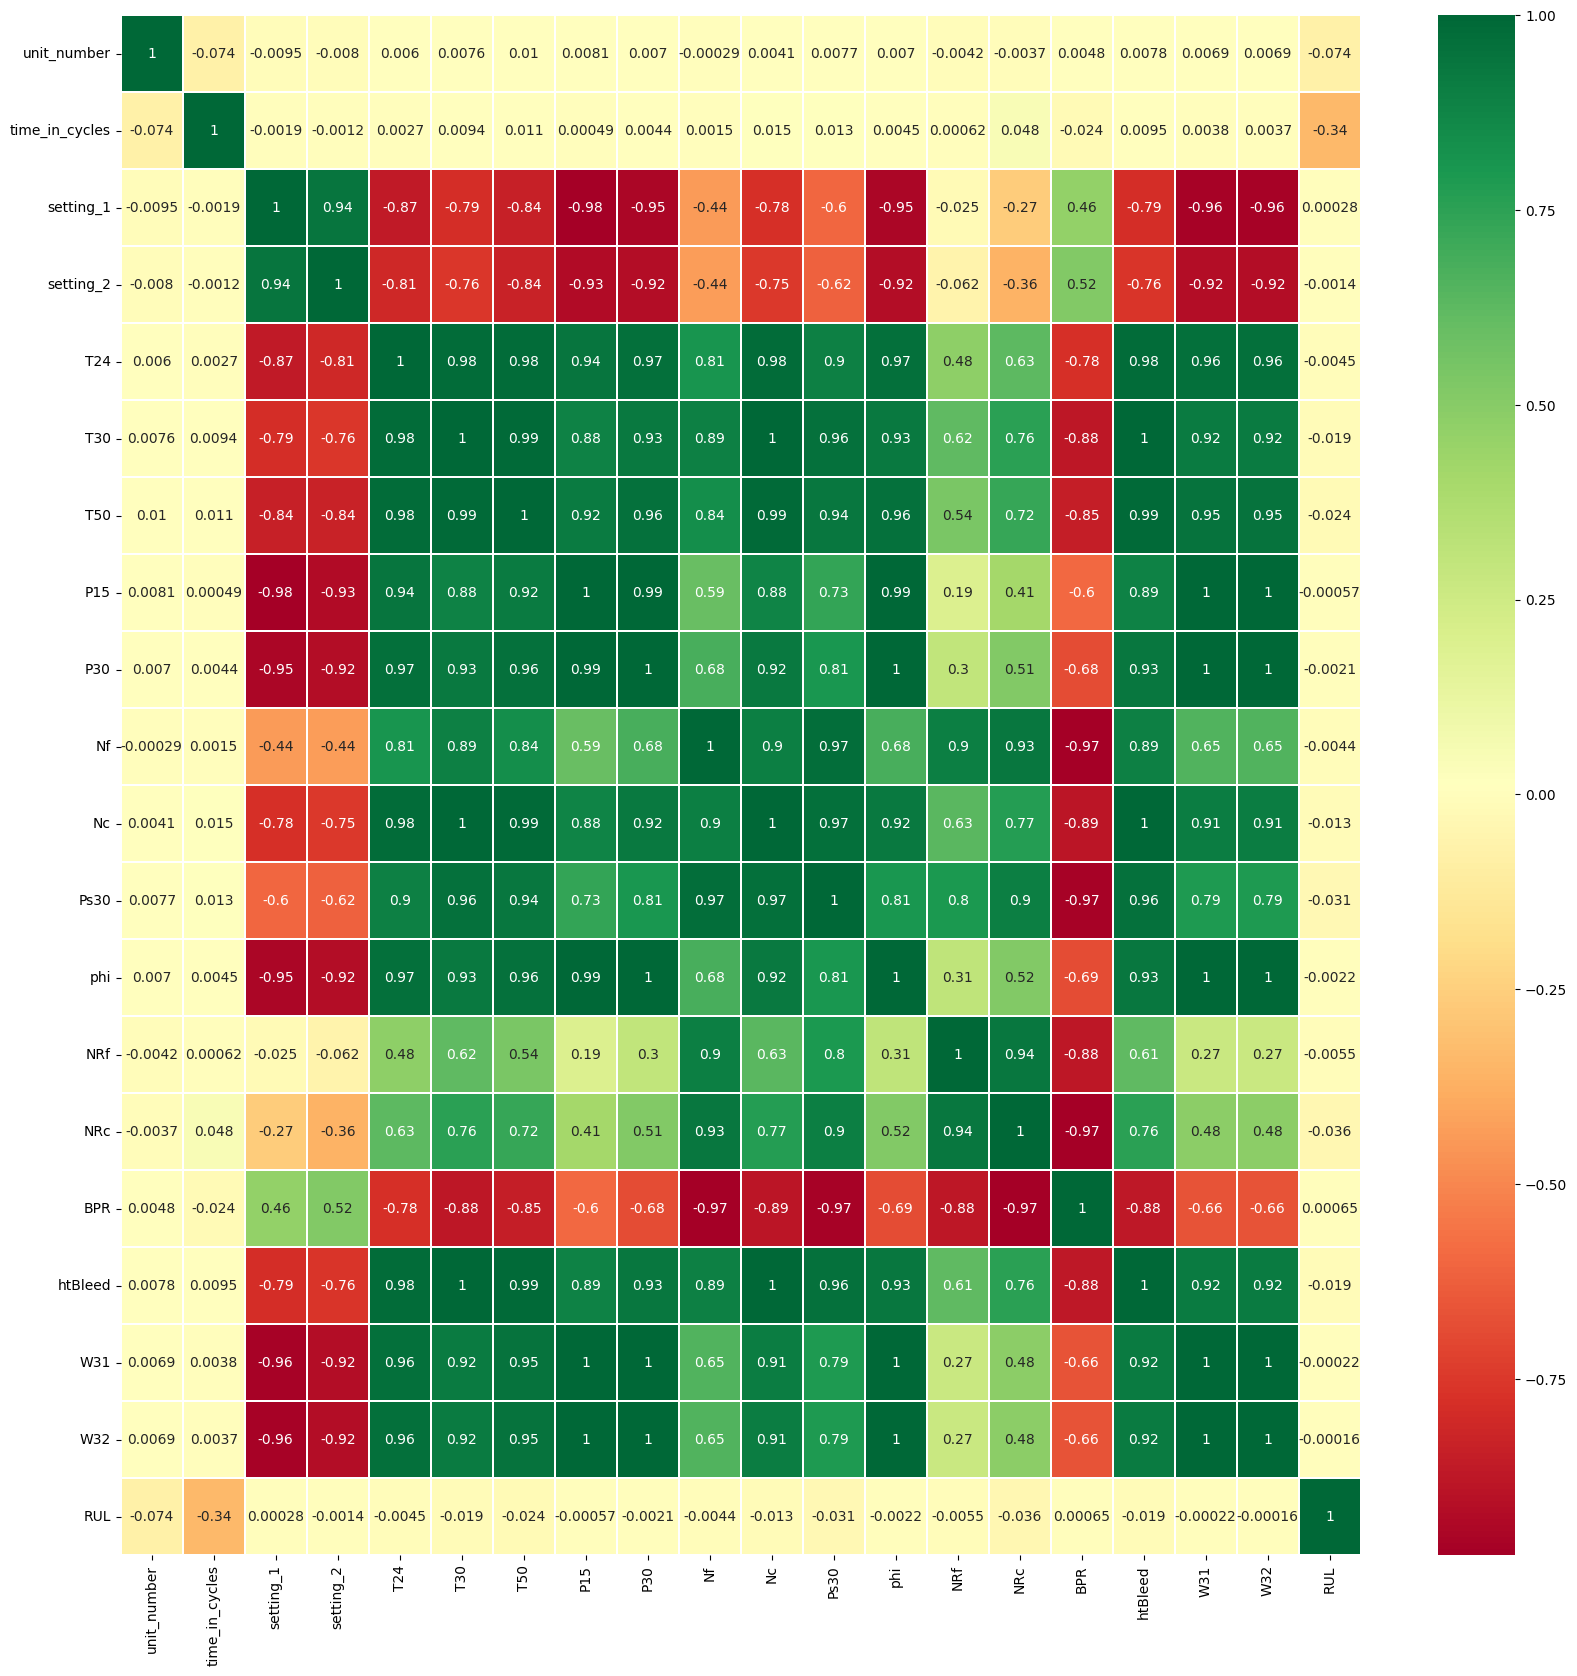

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
df = prepare_train_data(data)

sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()